# Introdução à Probabilidade e Estatística
Neste notebook, exploraremos alguns dos conceitos que discutimos anteriormente. Muitos conceitos de probabilidade e estatística estão bem representados nas principais bibliotecas de processamento de dados em Python, como `numpy` e `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Variáveis Aleatórias e Distribuições
Vamos começar extraindo uma amostra de 30 valores de uma distribuição uniforme de 0 a 9. Também iremos calcular a média e a variância.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Para estimar visualmente quantos valores diferentes existem na amostra, podemos plotar o **histograma**:


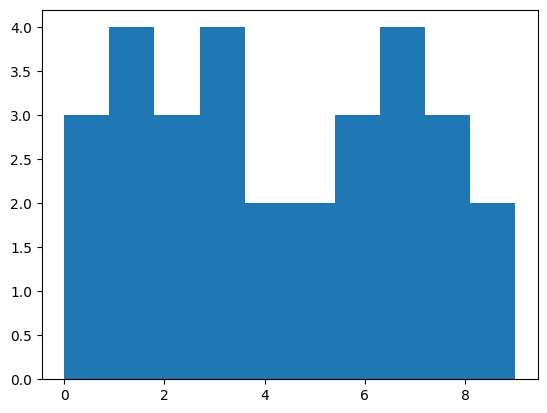

In [119]:
plt.hist(sample)
plt.show()

## Analisando Dados Reais

Média e variância são muito importantes ao analisar dados do mundo real. Vamos carregar os dados sobre jogadores de baseball de [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


Estamos utilizando um pacote chamado [**Pandas**](https://pandas.pydata.org/) aqui para análise de dados. Falaremos mais sobre Pandas e como trabalhar com dados em Python mais adiante neste curso.

Vamos calcular os valores médios para idade, altura e peso:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Agora vamos focar na altura e calcular o desvio padrão e a variância:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Além da média, faz sentido observar o valor mediano e os quartis. Eles podem ser visualizados usando um **gráfico de caixa**:


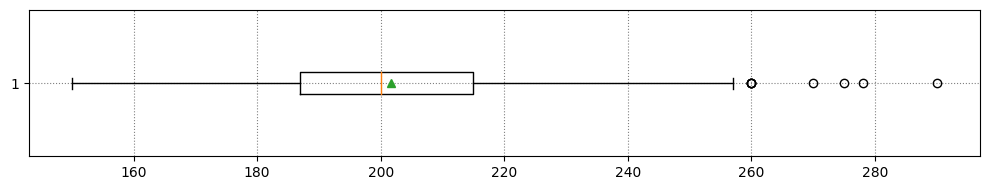

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Podemos também criar gráficos de caixa para subconjuntos do nosso conjunto de dados, por exemplo, agrupados por função do jogador.


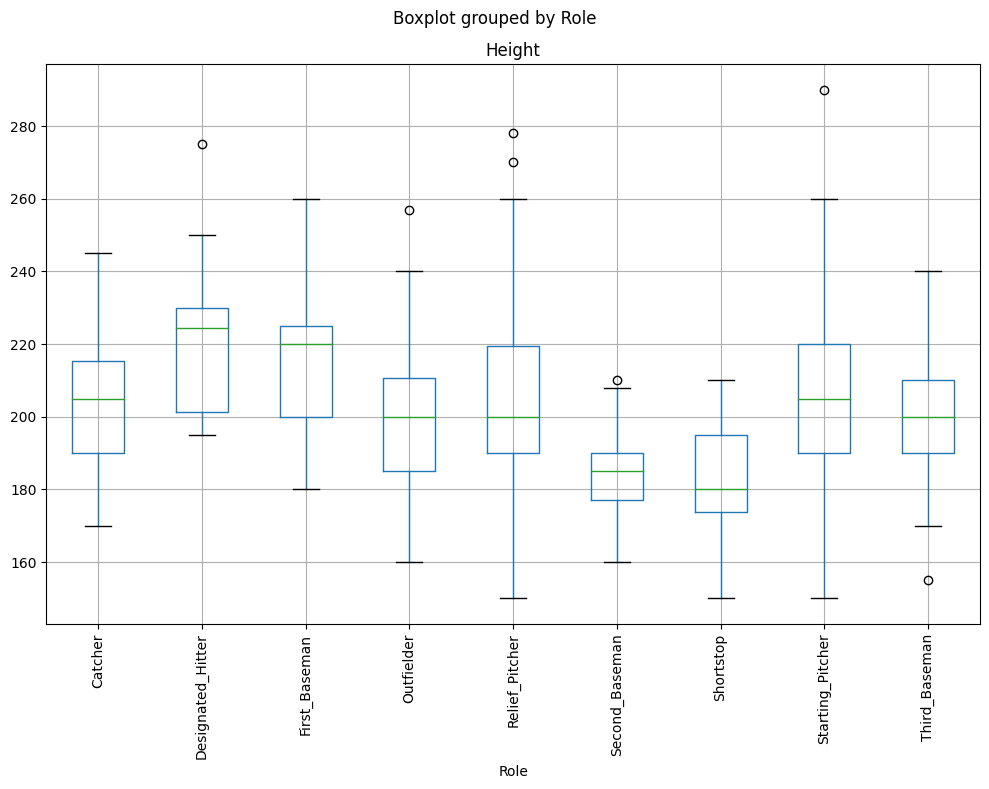

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Nota**: Este diagrama sugere que, em média, as alturas dos jogadores de primeira base são maiores do que as alturas dos jogadores de segunda base. Mais adiante, aprenderemos como testar essa hipótese de forma mais formal e como demonstrar que nossos dados são estatisticamente significativos para comprovar isso.

Idade, altura e peso são todas variáveis aleatórias contínuas. O que você acha que é a distribuição delas? Uma boa maneira de descobrir é traçar o histograma dos valores:


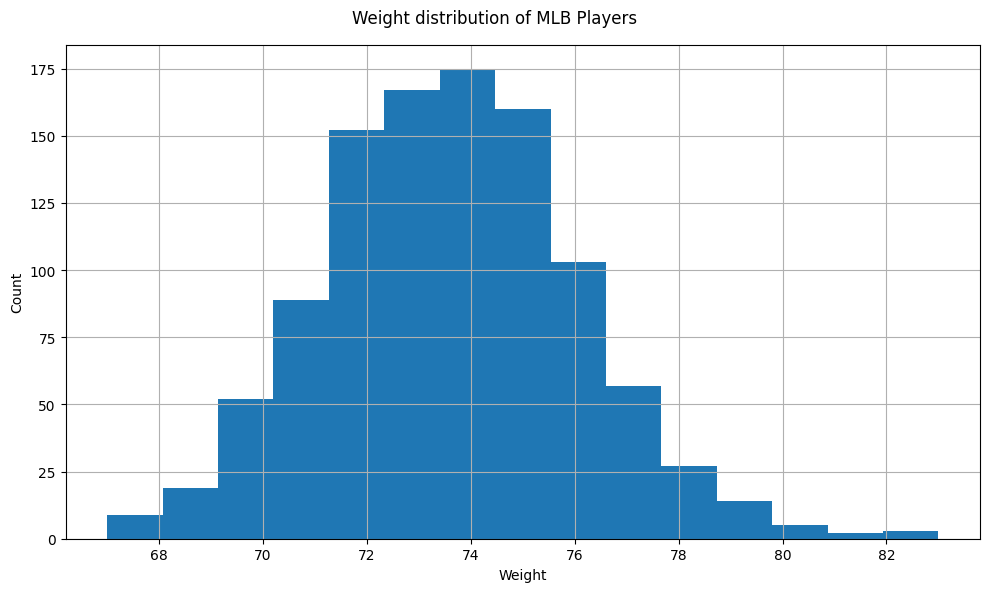

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Distribuição Normal

Vamos criar uma amostra artificial de pesos que segue uma distribuição normal com a mesma média e variância dos nossos dados reais:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

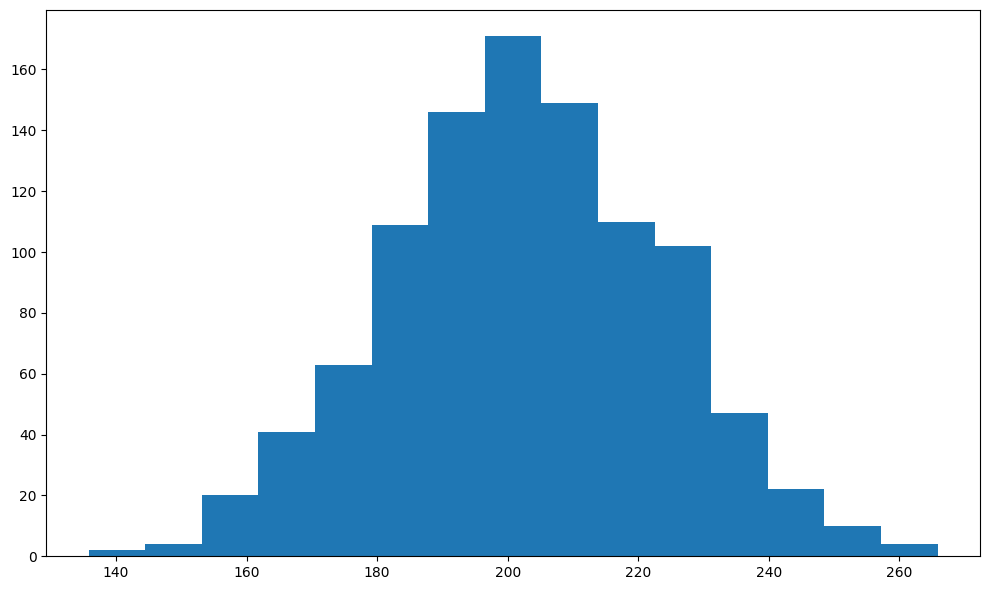

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

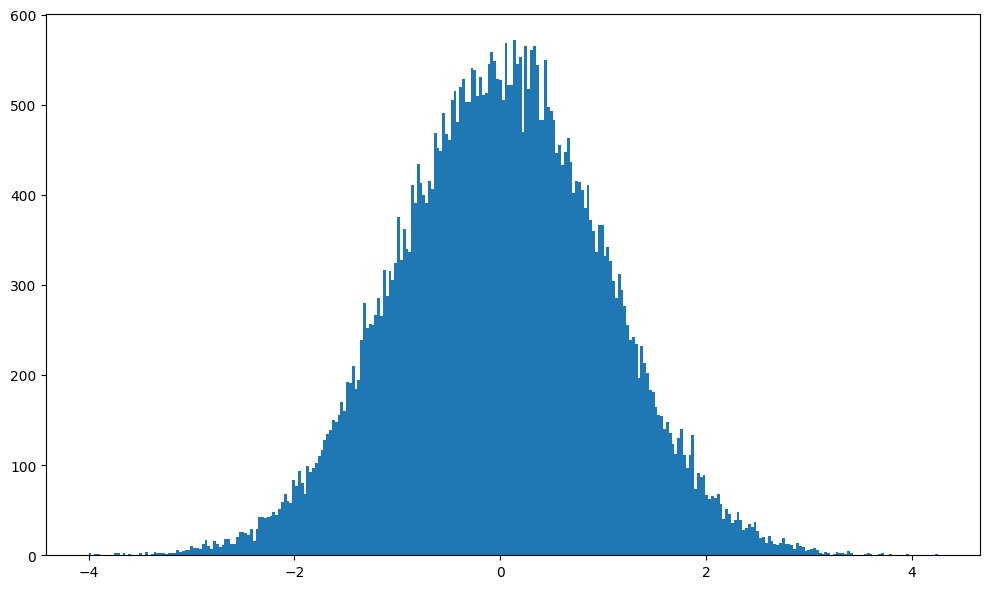

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Como a maioria dos valores na vida real segue uma distribuição normal, não devemos usar um gerador de números aleatórios uniformes para gerar dados de amostra. Aqui está o que acontece se tentarmos gerar pesos com uma distribuição uniforme (gerada por `np.random.rand`):


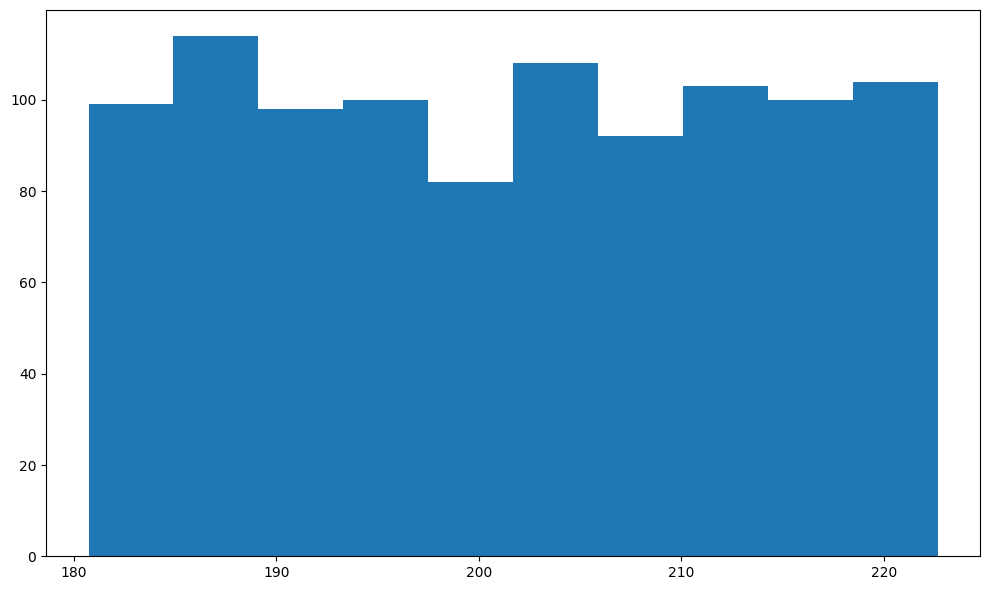

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Intervalos de Confiança

Agora vamos calcular intervalos de confiança para os pesos e alturas dos jogadores de baseball. Usaremos o código [desta discussão no Stack Overflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Teste de Hipóteses

Vamos explorar diferentes papéis no nosso conjunto de dados de jogadores de beisebol:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Podemos observar que os intervalos não se sobrepõem.

Uma maneira estatisticamente mais correta de comprovar a hipótese é usar um **teste t de Student**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Os dois valores retornados pela função `ttest_ind` são:  
* p-valor pode ser considerado como a probabilidade de duas distribuições terem a mesma média. No nosso caso, ele é muito baixo, o que significa que há fortes evidências de que os jogadores da primeira base são mais altos.  
* t-valor é o valor intermediário da diferença de médias normalizada que é usado no teste t, e ele é comparado com um valor limite para um determinado nível de confiança.  


## Simulando uma Distribuição Normal com o Teorema do Limite Central

O gerador pseudoaleatório em Python é projetado para nos fornecer uma distribuição uniforme. Se quisermos criar um gerador para distribuição normal, podemos usar o teorema do limite central. Para obter um valor com distribuição normal, basta calcular a média de uma amostra gerada uniformemente.


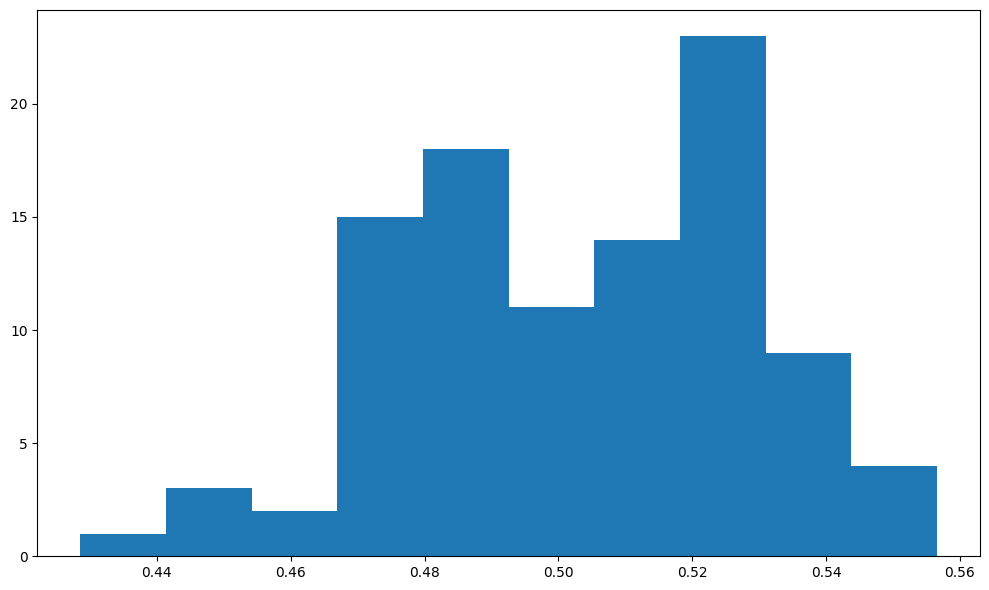

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Correlação e a Corporação Maligna de Baseball

A correlação nos permite encontrar relações entre sequências de dados. No nosso exemplo fictício, vamos imaginar que existe uma corporação maligna de baseball que paga seus jogadores de acordo com sua altura - quanto mais alto o jogador, mais dinheiro ele/ela recebe. Suponha que exista um salário base de $1000, e um bônus adicional de $0 a $100, dependendo da altura. Vamos pegar jogadores reais da MLB e calcular seus salários imaginários:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Vamos agora calcular a covariância e a correlação dessas sequências. `np.cov` nos dará uma chamada **matriz de covariância**, que é uma extensão da covariância para múltiplas variáveis. O elemento $M_{ij}$ da matriz de covariância $M$ é a correlação entre as variáveis de entrada $X_i$ e $X_j$, e os valores diagonais $M_{ii}$ são a variância de $X_{i}$. Da mesma forma, `np.corrcoef` nos dará a **matriz de correlação**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


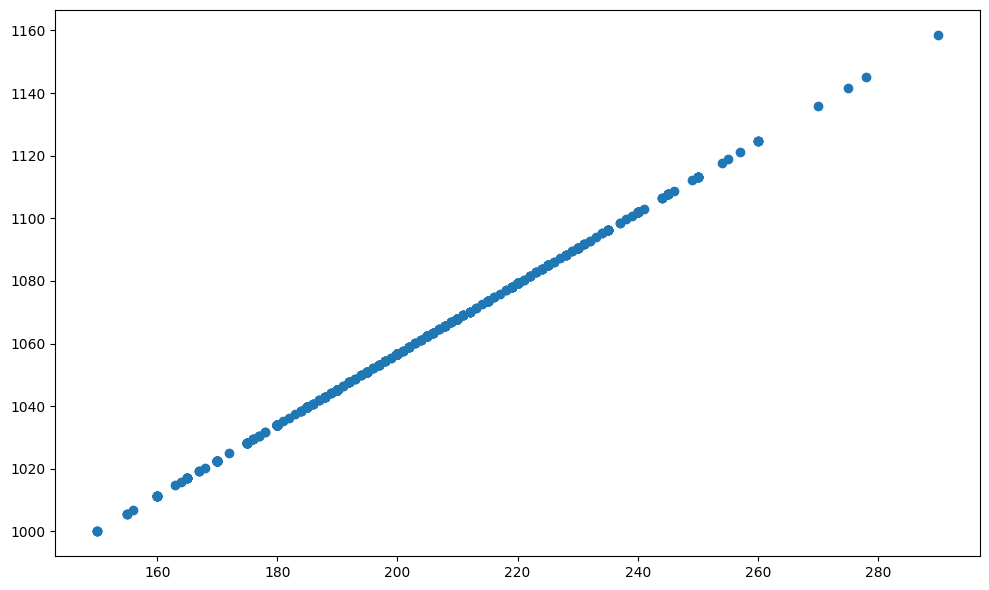

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


Neste caso, a correlação é ligeiramente menor, mas ainda é bastante alta. Agora, para tornar a relação ainda menos óbvia, podemos querer adicionar um pouco mais de aleatoriedade, adicionando alguma variável aleatória ao salário. Vamos ver o que acontece:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


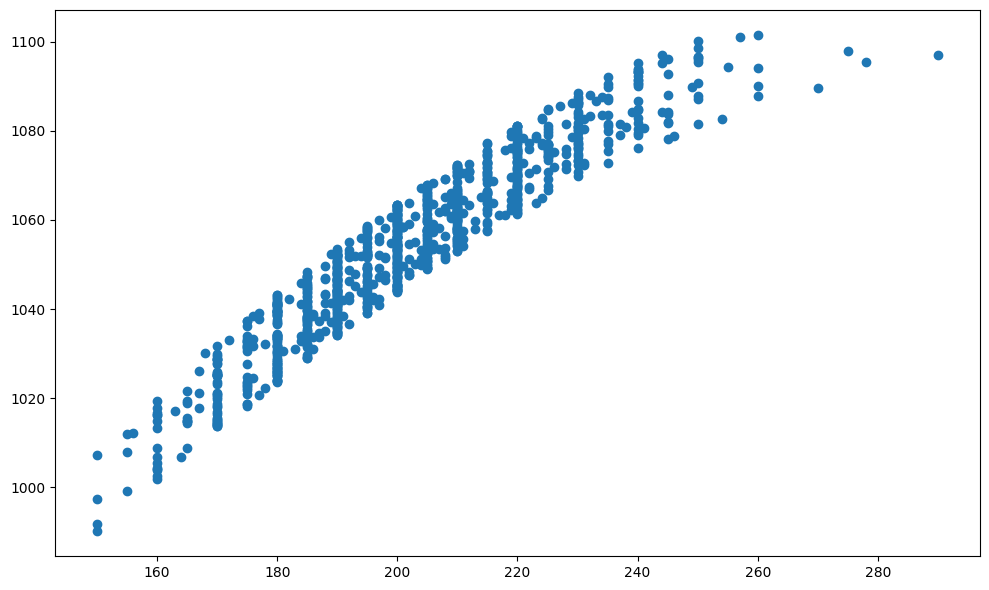

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Você consegue adivinhar por que os pontos se alinham em linhas verticais assim?

Observamos a correlação entre um conceito artificialmente criado, como salário, e a variável observada *altura*. Vamos também verificar se duas variáveis observadas, como altura e peso, também apresentam correlação:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Infelizmente, não obtivemos nenhum resultado - apenas alguns valores estranhos `nan`. Isso ocorre porque alguns dos valores em nossa série estão indefinidos, representados como `nan`, o que faz com que o resultado da operação também seja indefinido. Ao observar a matriz, podemos ver que a coluna problemática é `Weight`, porque a autocorrelação entre os valores de `Height` foi calculada.

> Este exemplo mostra a importância da **preparação** e **limpeza** dos dados. Sem dados adequados, não podemos calcular nada.

Vamos usar o método `fillna` para preencher os valores ausentes e calcular a correlação:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

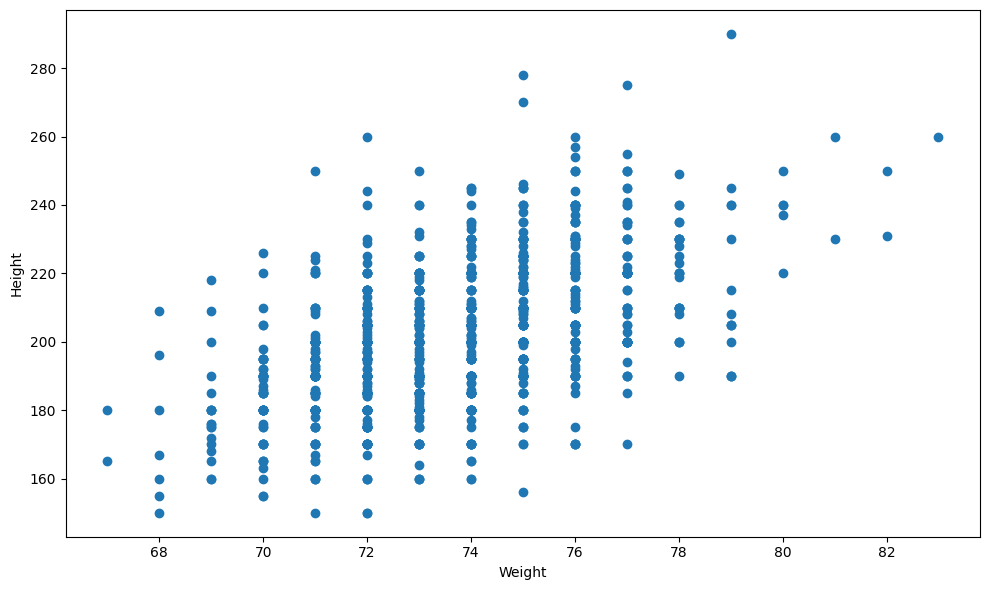

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Conclusão

Neste notebook, aprendemos como realizar operações básicas em dados para calcular funções estatísticas. Agora sabemos como utilizar um conjunto sólido de ferramentas matemáticas e estatísticas para comprovar algumas hipóteses e como calcular intervalos de confiança para variáveis arbitrárias a partir de uma amostra de dados.



---

**Aviso Legal**:  
Este documento foi traduzido utilizando o serviço de tradução por IA [Co-op Translator](https://github.com/Azure/co-op-translator). Embora nos esforcemos para garantir a precisão, esteja ciente de que traduções automáticas podem conter erros ou imprecisões. O documento original em seu idioma nativo deve ser considerado a fonte oficial. Para informações críticas, recomenda-se a tradução profissional realizada por humanos. Não nos responsabilizamos por quaisquer mal-entendidos ou interpretações equivocadas decorrentes do uso desta tradução.
